In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
#from scipy.interpolate import spline

In [2]:
# Data is in HD1 PC9
runv9ATP = pd.read_csv('data/v9spd_std273ATP.csv', names=['spd','std'])
v9R08ATP = pd.read_csv('data/v9spd_std213R08ATP.csv', names=['spd','std'])
v9R09ATP = pd.read_csv('data/v9spd_std213R09ATP.csv', names=['spd','std'])

rv9ATP = np.array([30,50,100,1000,2000,3000])
xv9ATP = np.array([30,100,1000,2000,3000])

### $speed = \frac{ATP \times speed_{max}}{ATP+K_m}$, $speed_{max} = \frac{speed \times (K_m+ATP)}{ATP}$

In [20]:
atp = rv9ATP; atpx = xv9ATP; spd10 = runv9ATP['spd']; spd09 = v9R09ATP['spd']; spd08 = v9R08ATP['spd'] #NB: atp is the substrate [s]

def michaelis10(atp,km):
    return( (atp*spd10.max())/(atp+km) )
popt10, pcov10 = curve_fit(michaelis10, atp, spd10)
kmVal10 = popt10[0]
yVal10 = ( atp*spd10.max() ) / (kmVal10+atp) # yVakl V = Vmax
#v10max = ( spd10 * (kmVal10+atp) ) / (atp)

def michaelis09(atpx,km):
    return( (atpx*spd09.max())/(atpx+km) )
popt09, pcov09 = curve_fit(michaelis09, atpx, spd09)
kmVal09 = popt09[0]
yVal09 = ( atp*spd09.max() ) / (kmVal09+atp)

def michaelis08(atpx,km):
    return( (atpx*spd08.max())/(atpx+km) )
popt08, pcov08 = curve_fit(michaelis08, atpx, spd08)
kmVal08 = popt08[0]
yVal08 = ( atp*spd08.max() ) / (kmVal08+atp)

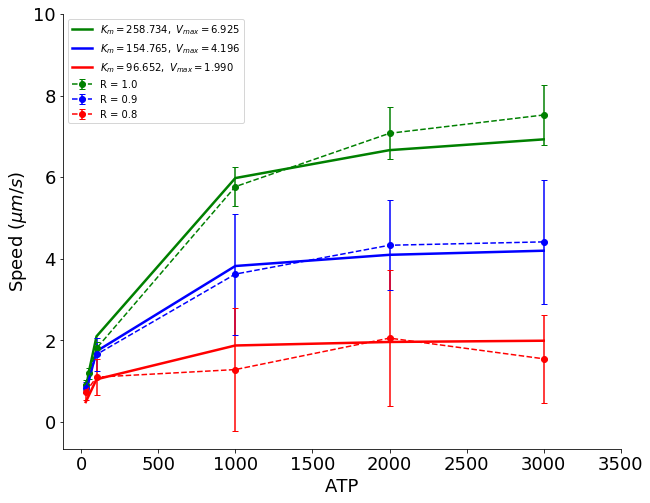

In [25]:
# NB: Data is in HD1 PC9

fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(rv9ATP,runv9ATP['spd'],runv9ATP['std'], capsize=3, linestyle='--', color='green', marker='o', ecolor='green', label='R = 1.0')
ax.plot(rv9ATP,michaelis10(atp,*popt10),'g-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmVal10,np.max(yVal10)))
ax.errorbar(xv9ATP,v9R09ATP['spd'],v9R09ATP['std'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='blue', label='R = 0.9')
ax.plot(xv9ATP,michaelis09(atpx,*popt09),'b-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmVal09,np.max(yVal09)))
ax.errorbar(xv9ATP,v9R08ATP['spd'],v9R08ATP['std'], capsize=3, linestyle='--', color='red', marker='o', ecolor='red', label='R = 0.8')
ax.plot(xv9ATP,michaelis08(atpx,*popt08),'r-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmVal08,np.max(yVal08)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(0,12,2))
ax.set_xticks(np.arange(0,3501,500))
ax.tick_params(labelsize=18)

ax.set_xlabel('ATP', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)

ax.legend(loc='upper left')

#plt.savefig('fig/rv9SpdATPv7*.png', fmt='png', dpi=1000, bbox_inches='tight')
#plt.savefig('fig/rv9SpdATPv7*.svg', fmt='svg', dpi=1000, bbox_inches='tight')

## $\frac{1}{v} = \frac{K_m}{V_{max}}\times\frac{1}{ATP}+\frac{1}{V_{max}}$ => $y=mx+c$

## $V_{max} = \frac{1}{intercept}$,  $K_m = V_{max}\times slope$

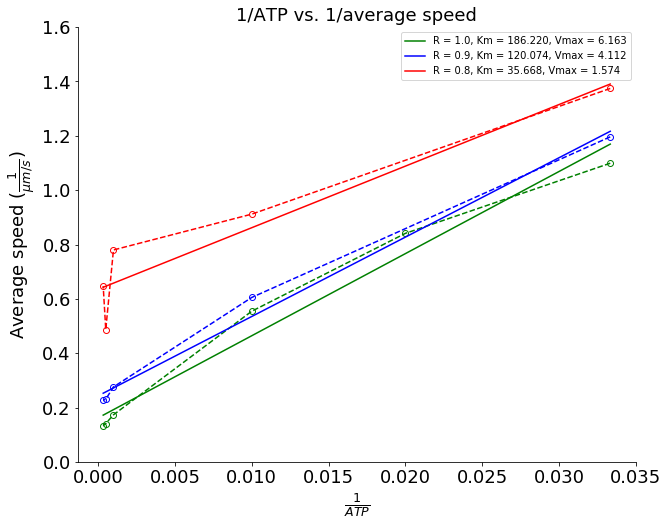

In [26]:
fig, ax = plt.subplots(figsize=(10,8))

#from scipy.interpolate import interp1d

xx = 1/rv9ATP; yy = 1/runv9ATP['spd']
xx2 = 1/xv9ATP; yy2 = 1/v9R09ATP['spd']
xx3 = 1/xv9ATP; yy3 = 1/v9R08ATP['spd']

#f = interp1d(xx,yy,kind='cubic')

slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
vmax = 1/intercept; km = slope/intercept
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xx2,yy2)
vmax2 = 1/intercept2; km2 = slope2/intercept2
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(xx3,yy3)
vmax3 = 1/intercept3; km3 = slope3/intercept3

#zz = np.polyfit(xx,yy,1)
#f = np.poly1d(zz)

plt.plot(xx,yy, marker='o', color='green', linestyle='--', markerfacecolor='none')
plt.plot(xx,(slope*xx+intercept), color='green', label='R = 1.0, Km = %.3f, Vmax = %.3f'%(km,vmax))
#plt.plot((0,max(xx)), (f(0),f(max(x))), 'r' )

plt.plot(xx2,yy2, marker='o', color='blue', linestyle='--', markerfacecolor='none')
plt.plot(xx2,(slope2*xx2+intercept2), color='blue', label='R = 0.9, Km = %.3f, Vmax = %.3f'%(km2,vmax2))

plt.plot(xx3,yy3, marker='o', color='red', linestyle='--', markerfacecolor='none')
plt.plot(xx3,(slope3*xx3+intercept3), color='red', label='R = 0.8, Km = %.3f, Vmax = %.3f'%(km3,vmax3))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,0.040,step=0.005))
ax.set_yticks(np.arange(0,1.61,step=0.2))
ax.tick_params(labelsize=18)

ax.set_title('1/ATP vs. 1/average speed', fontsize=18)
ax.set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax.set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
ax.legend(loc='best')
#ax.grid()

#plt.savefig('fig/micInvFitATP50to500v7*.png',fmt='png',dpi=1000, bbox_inches='tight')
#plt.savefig('fig/micInvFitATP50to500v7*.svg',fmt='svg',dpi=1000, bbox_inches='tight')

plt.show()


In [11]:
v9all = pd.read_csv('spd_std273V9.csv', names=['spd','std'])
rv9 = np.array([0.2,0.4,0.6,0.8,1.0])

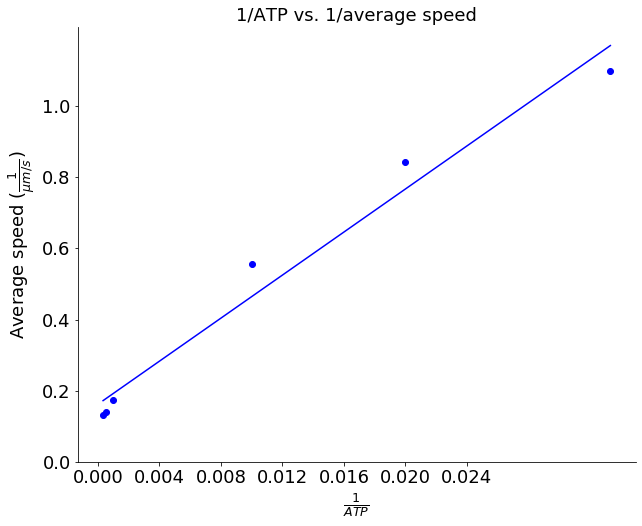

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

#from scipy.interpolate import interp1d

xx = 1/rv9ATP; yy = 1/runv9ATP['spd']
#xx = 1/rv9ATP; yy = 1/v9R09ATP['spd']

#f = interp1d(xx,yy,kind='cubic')

#slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)

#zz = np.polyfit(xx,yy,1)
#f = np.poly1d(zz)

#plt.plot(xx,yy,'go')
#plt.plot(xx,(slope*xx+intercept), color='green')

#plt.plot((0,max(xx)), (f(0),f(max(x))), 'r' )

plt.plot(xx,yy,'bo')
plt.plot(xx,(slope*xx+intercept), color='blue')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,0.0241,step=0.004))
ax.set_yticks(np.arange(0,1.1,step=0.2))
ax.tick_params(labelsize=18)

ax.set_title('1/ATP vs. 1/average speed', fontsize=18)
ax.set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax.set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
#ax.legend(loc='best')
#ax.grid()

#plt.savefig('micInvFitATP50to500.svg',fmt='svg',dpi=3000, bbox_inches='tight')

plt.show()
